In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from skew import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

images = [f for f in listdir(
    '../datasets/dataset/test/skewed') if isfile(join('../datasets/dataset/test/skewed', f))]
images = ['../datasets/dataset/test/skewed/' + i for i in images]

# Example

The mean absolute error of the image is 0.0


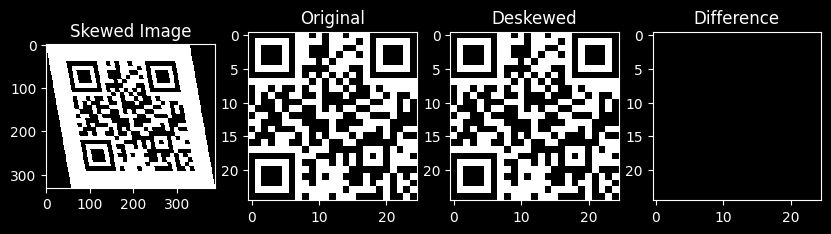

Cannot deskew this image


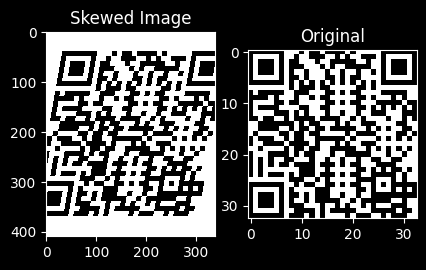

The mean absolute error of the image is 0.0


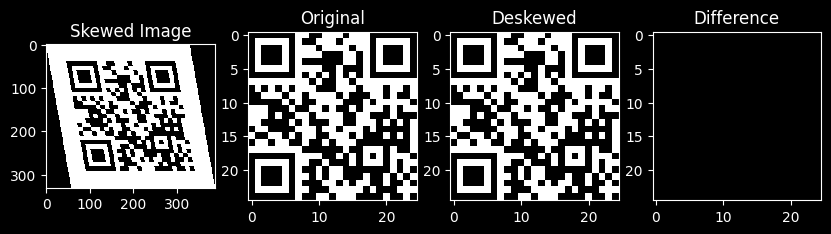

The mean absolute error of the image is 0.0


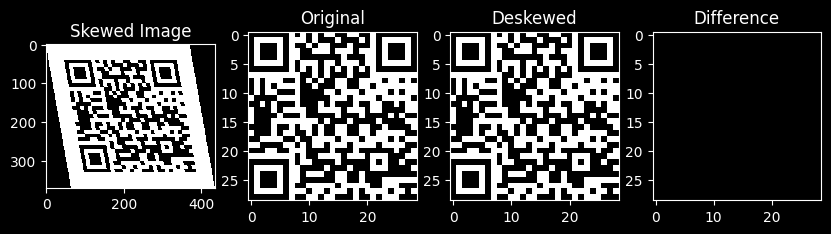

In [7]:
skew = Skew()
detect = cv2.QRCodeDetector()
       
for image in images[:4]:
    orig = cv2.imread(image)
    img = cv2.imread(image.replace('skewed', 'original'), cv2.IMREAD_GRAYSCALE)
    deskewed = skew.deskew(orig)
    
    value1, points1, straight_qrcode1 = detect.detectAndDecode(img)
    deskewed = np.pad(array=deskewed, pad_width=50, mode='constant', constant_values=255)
    value2, points2, straight_qrcode2 = detect.detectAndDecode(deskewed)
    
    plt.subplot(1, 4, 1)
    plt.title('Skewed Image')
    plt.imshow(orig)
    
    plt.subplot(1, 4, 2)
    plt.title('Original')
    plt.imshow(straight_qrcode1)
    
    if straight_qrcode2 is not None:
        plt.subplot(1, 4, 3)
        plt.title('Deskewed')
        plt.imshow(straight_qrcode2)

        plt.subplot(1, 4, 4)
        plt.title('Difference')
        plt.imshow(straight_qrcode1 ^ straight_qrcode2)
        print(f'The mean absolute error of the image is {np.mean(np.abs(straight_qrcode1 - straight_qrcode2))}')
    else:
        print('Cannot deskew this image')
    plt.show()
    

# Test Dataset

In [8]:
def read_qr_code(img):
    """Read an image and read the QR code.
    
    Args:
        filename (string): Path to file
    
    Returns:
        qr (string): Value from QR code
    """
    
    try:
        detect = cv2.QRCodeDetector()
#         print(detect)
        value, points, straight_qrcode = detect.detectAndDecode(img)
        return value
    except:
        return

## Decode value

In [9]:
from skew import *

skew = Skew()
acc = 0
failed = []
for index, path in enumerate(images): 
    true_val = path[-11:-7]
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    deskewed = skew.deskew(img)
    read = read_qr_code(deskewed)
    if read == true_val:
        acc += 1
    else:
        failed.append(path)
    print(f'Image #{index+1}\tPath: {path}\tTrue value: {true_val}\tPredicted: {read}')

Image #1	Path: ../datasets/dataset/test/skewed/1746-v2.png	True value: 1746	Predicted: 1746
Image #2	Path: ../datasets/dataset/test/skewed/1463-v4.png	True value: 1463	Predicted: 
Image #3	Path: ../datasets/dataset/test/skewed/2045-v2.png	True value: 2045	Predicted: 2045
Image #4	Path: ../datasets/dataset/test/skewed/1918-v3.png	True value: 1918	Predicted: 1918
Image #5	Path: ../datasets/dataset/test/skewed/1818-v3.png	True value: 1818	Predicted: 1818
Image #6	Path: ../datasets/dataset/test/skewed/1275-v4.png	True value: 1275	Predicted: 1275
Image #7	Path: ../datasets/dataset/test/skewed/1557-v1.png	True value: 1557	Predicted: 1557
Image #8	Path: ../datasets/dataset/test/skewed/1534-v1.png	True value: 1534	Predicted: 
Image #9	Path: ../datasets/dataset/test/skewed/1818-v2.png	True value: 1818	Predicted: 1818
Image #10	Path: ../datasets/dataset/test/skewed/1918-v2.png	True value: 1918	Predicted: 1918
Image #11	Path: ../datasets/dataset/test/skewed/1538-v1.png	True value: 1538	Predicted:

In [10]:
print(f'The accuracy on this dataset is {round(acc*100/len(images), 2)}%')

The accuracy on this dataset is 73.0%


## Compare Images

In [11]:
def mse(img1, img2):
    h, w = img1.shape
    diff = cv2.subtract(img1, img2)
    err = np.sum(diff**2)
    mse = err/(float(h*w))
    return mse

In [12]:
errors = []
detect = cv2.QRCodeDetector()
for index, path in enumerate(images): 
    print(f'Image #{index+1}\t Path: {path}')
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    deskewed = skew.deskew(img)
    _, _, orig_qr = detect.detectAndDecode(img)
    _, _, deskew_qr = detect.detectAndDecode(deskewed)
    if deskew_qr is not None:
#         plt.subplot(1, 2, 1)
#         plt.title('Original Extr')
#         plt.imshow(orig_qr)

#         plt.subplot(1, 2, 2)
#         plt.title('Deskewed Extr')
#         plt.imshow(deskew_qr)
#         plt.show()
        errors.append(mse(orig_qr, deskew_qr))
        print(mse(orig_qr, deskew_qr))

Image #1	 Path: ../datasets/dataset/test/skewed/1746-v2.png
0.0
Image #2	 Path: ../datasets/dataset/test/skewed/1463-v4.png
Image #3	 Path: ../datasets/dataset/test/skewed/2045-v2.png
0.0
Image #4	 Path: ../datasets/dataset/test/skewed/1918-v3.png
0.0
Image #5	 Path: ../datasets/dataset/test/skewed/1818-v3.png
0.0
Image #6	 Path: ../datasets/dataset/test/skewed/1275-v4.png
0.0
Image #7	 Path: ../datasets/dataset/test/skewed/1557-v1.png
0.0
Image #8	 Path: ../datasets/dataset/test/skewed/1534-v1.png
Image #9	 Path: ../datasets/dataset/test/skewed/1818-v2.png
0.0
Image #10	 Path: ../datasets/dataset/test/skewed/1918-v2.png
0.0
Image #11	 Path: ../datasets/dataset/test/skewed/1538-v1.png
0.0
Image #12	 Path: ../datasets/dataset/test/skewed/2045-v3.png
0.0
Image #13	 Path: ../datasets/dataset/test/skewed/1746-v3.png
0.0
Image #14	 Path: ../datasets/dataset/test/skewed/2128-v4.png
0.0
Image #15	 Path: ../datasets/dataset/test/skewed/1582-v4.png
0.0
Image #16	 Path: ../datasets/dataset/test/

In [13]:
print(f'The mean squared error of this dataset is {round(np.mean(errors), 2)}')

The mean squared error of this dataset is 0.0
